<a href="https://colab.research.google.com/github/suryakanthPS/DS_Mini-Projects/blob/main/As7_Q1_Clustering_Airline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [ ]:
#import data
data = pd.read_csv("/content/EastWestAirlines.csv")
data

## EDA

In [ ]:
data.info()

In [ ]:
data1=data.drop(['ID#'],axis=1)
data1

In [ ]:
data2 = pd.DataFrame(normalize(data1),columns=data1.columns)
data2

# **Fitting Hierarchical cluster**


## Dendrogram

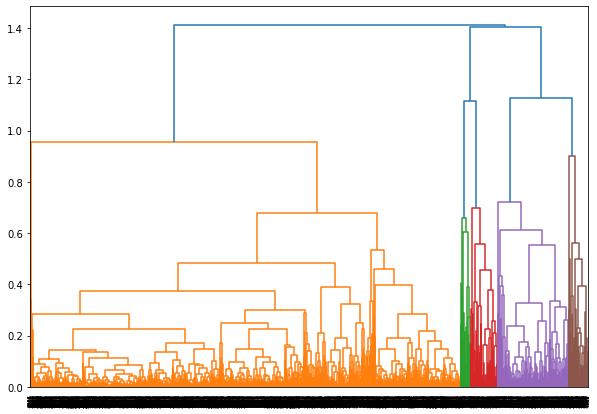

In [ ]:
#Creating dendrogram fo find the optimal no of clusters
plt.figure(figsize=(10, 7))  
dendograms=sch.dendrogram(sch.linkage(data2,'complete'))

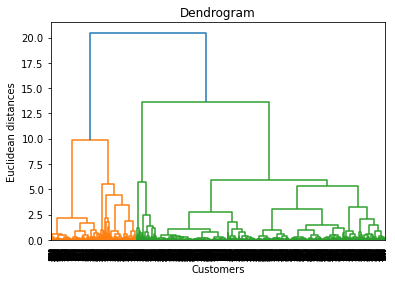

In [ ]:
dendrogram = sch.dendrogram(sch.linkage(data2, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [ ]:
hc=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
hc

AgglomerativeClustering(n_clusters=5)

## Predict cluster in dataset

In [ ]:
y=pd.DataFrame(hc.fit_predict(data2),columns=['clustersid'])
y.value_counts()

clustersid
2             1547
4             1191
3              579
1              453
0              229
dtype: int64

In [ ]:
#Add cluster to dataset
data1['clusterid'] = hc.labels_
data1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid
0,28143,0,1,1,1,174,1,0,0,7000,0,4
1,19244,0,1,1,1,215,2,0,0,6968,0,2
2,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,14776,0,1,1,1,500,1,0,0,6952,0,2
4,97752,0,4,1,1,43300,26,2077,4,6935,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,3
3995,64385,0,1,1,1,981,5,0,0,1395,1,4
3996,73597,0,3,1,1,25447,8,0,0,1402,1,2
3997,54899,0,1,1,1,500,1,500,1,1401,0,4


## Visualizing the cluster

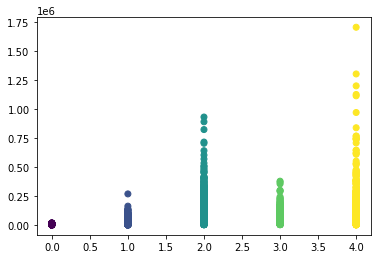

In [ ]:
plt.scatter(data1['clusterid'],data1['Balance'],c=hc.labels_)

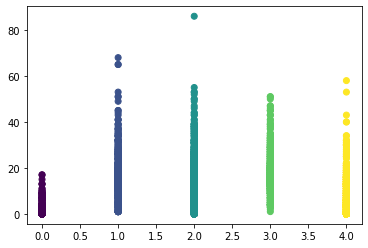

In [ ]:
plt.scatter(data1['clusterid'],data1['Bonus_trans'],c=hc.labels_)

In [ ]:
# Visualising the clusters
plt.scatter(data2[hc == 0, 0], data2[hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(data2[hc == 1, 0], data2[hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(data2[hc == 2, 0], data2[hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(data2[hc == 3, 0], data2[hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(data2[hc == 4, 0], data2[hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.legend()
plt.show()

# **Fitting KMeans cluster**

In [ ]:
#Normalize heterogeneous data by using Standard Scaler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
datakm1 = StandardScaler().fit_transform(data1)
datakm1

In [ ]:
# Use Elbow Graph to find optimum number of  clusters (K value) from K values range
# The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion WCSS 
# random state can be anything from 0 to 42, but the same number to be used everytime,so that the results don't change. 

In [ ]:
#Within cluster sum-of-square criterion
wcss=[]
for i in range (1,11):
  kmeans = KMeans(n_clusters=i, random_state=0)
  kmeans.fit(datakm1)
  wcss.append(kmeans.inertia_)

## Elbow plot

In [ ]:
#Creating elbow plot fo find the optimal no of clusters
plt.plot(range(1,11),wcss)
plt.title('Elbow Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [ ]:
#KMeans algorithm k=4
cluster4km = KMeans(n_clusters=4, init='k-means++', max_iter= 300, n_init= 10, random_state=20).fit(datakm1)
cluster4km

In [ ]:
cluster4km.labels_

## Predict cluster in dataset

In [ ]:
#add cluster to dataset
datakm2 = data1.copy()
datakm2['clusters4id'] = cluster4km.labels_
datakm2

In [ ]:
y=pd.DataFrame(hc.fit_predict(datakm2),columns=['clusters4id'])
y.value_counts()

clusters4id
2              2185
4              1030
1               624
3               134
0                26
dtype: int64

In [ ]:
#Group data by Clusters (K=4)
datakm2.groupby('clusters4id').agg(['mean']).reset_index()

,clusters4id,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,43793.917814,97.436886,1.221785,1.019269,1.000393,4700.690916,6.918993,198.621707,0.618168,3691.559969,0.201337
1,1,116817.336214,154.756481,3.701493,1.002357,1.001571,39216.199529,18.759623,334.355852,0.997643,4893.491752,0.648075
2,2,191573.726190,775.863095,2.172619,1.035714,1.000000,31412.160714,26.779762,5365.672619,15.636905,4665.827381,0.809524
3,3,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333


## Visualization

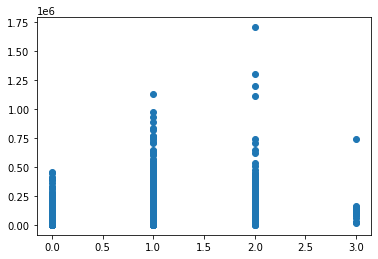

In [ ]:
plt.scatter(datakm2['clusters4id'], datakm2['Balance'])